In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv('restaurant_data.csv')
risks = {'None': 0, 'Moderate Risk': 2, 'Low Risk': 2, 'High Risk': 3}
health_office = [37.778155, -122.418614]
df['miles_from_inspector'] = (((df.latitude - health_office[0])*69)**2 + ((df.longitude - health_office[1])*55)**2)**.5
df['risk_numeric'] = [risks[c] for c in df.risk_category]
df['time'] = [pd.to_datetime('{}/{}/{}'.format(r[1].day, r[1].month, r[1].year), format='%d/%m/%Y') for r in df.iterrows()]
df.head()

,month,day,year,business_id,risk_category,inspection_score,zipcode,latitude,longitude,miles_from_inspector,risk_numeric,time
0,2,26,2018,10030,None,100,94103,37.766864,-122.419014,0.779390,0,2018-02-26
1,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05
2,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05
3,4,26,2019,10083,Moderate Risk,86,94111,37.794024,-122.401299,1.451159,2,2019-04-26
4,9,19,2017,10280,Moderate Risk,92,94102,37.782034,-122.419777,0.275188,2,2017-09-19


In [136]:
df['time_since'] = -1
for b in df.business_id.unique():
    dfb = df[df.business_id == b].sort_values('time', ascending =False)
    if len(dfb.time.unique()) > 1:
        last = max(dfb.time)
        prev = max([t for t in dfb.time if t < last])
        ind = dfb.index[0]
        since = last - prev
        df.loc[ind,'time_since'] = int(since.days)

In [141]:
df = df.replace(-1,df[(df.time_since != -1) & (df.year != 2019)].time_since.mean())

In [166]:
X = df[df.year != 2019]
X = df[['time', 'business_id', 'risk_numeric', 'inspection_score', 'miles_from_inspector', 'time_since']]
max_times = {}
for i, row in X.iterrows():
    if row.business_id in max_times:
        max_times[row.business_id] = max([max_times[row.business_id], row.time])
    else:
        max_times[row.business_id] = row.time
X = X[X.time < X.apply(lambda row:max_times[row.business_id], axis=1)]

In [167]:
max_risk = {}
for i, row in X.iterrows():
    key = '{}{}'.format(row.business_id, row.time)
    if key in max_risk:
        max_risk[key] = max([max_risk[key], row.risk_numeric])
    else:
        max_risk[key] = row.risk_numeric
X[X.risk_numeric]

{'100832017-09-05 00:00:00': 2, '102802017-09-19 00:00:00': 2, '102802018-04-05 00:00:00': 2, '102802018-10-18 00:00:00': 3, '102822017-05-23 00:00:00': 3, '103322017-10-02 00:00:00': 2, '103322018-11-27 00:00:00': 2, '104332017-07-28 00:00:00': 2, '105402017-06-05 00:00:00': 3, '105402018-06-15 00:00:00': 3, '106252017-09-27 00:00:00': 3, '108752018-04-11 00:00:00': 2, '108772018-01-09 00:00:00': 2, '109312018-01-17 00:00:00': 2, '109902016-11-14 00:00:00': 2, '109902017-11-14 00:00:00': 2, '113042018-01-16 00:00:00': 2, '115682017-11-13 00:00:00': 2, '115942017-01-30 00:00:00': 2, '116102016-12-27 00:00:00': 2, '118602017-03-14 00:00:00': 2, '118602017-10-23 00:00:00': 2, '127682017-11-20 00:00:00': 2, '129702017-08-09 00:00:00': 3, '129702017-12-18 00:00:00': 0, '129702018-04-13 00:00:00': 0, '132182017-08-29 00:00:00': 2, '136232018-06-22 00:00:00': 3, '138312017-11-15 00:00:00': 2, '138382018-04-25 00:00:00': 2, '140052017-01-31 00:00:00': 2, '140052017-12-05 00:00:00': 2, '140712

In [165]:
X

,time,business_id,risk_numeric,inspection_score,miles_from_inspector,time_since
1,2017-09-05,10083,2,81,1.451159,350.734694
2,2017-09-05,10083,2,81,1.451159,350.734694
4,2017-09-19,10280,2,92,0.275188,350.734694
5,2018-04-05,10280,2,88,0.275188,350.734694
6,2018-10-18,10280,3,81,0.275188,350.734694
7,2018-10-18,10280,2,81,0.275188,350.734694
8,2018-10-18,10280,2,81,0.275188,350.734694
9,2018-10-18,10280,2,81,0.275188,350.734694
12,2017-05-23,10282,3,91,1.676005,350.734694
15,2017-10-02,10332,2,79,0.400260,350.734694


In [52]:
df

,month,day,year,business_id,risk_category,inspection_score,zipcode,latitude,longitude,miles_from_inspector,risk_numeric,time
0,2,26,2018,10030,None,100,94103,37.766864,-122.419014,0.779390,0,2018-02-26
1,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05
2,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05
3,4,26,2019,10083,Moderate Risk,86,94111,37.794024,-122.401299,1.451159,2,2019-04-26
4,9,19,2017,10280,Moderate Risk,92,94102,37.782034,-122.419777,0.275188,2,2017-09-19
...,...,...,...,...,...,...,...,...,...,...,...,...
3230,5,29,2019,93363,Moderate Risk,96,94133,37.797948,-122.406393,1.522161,2,2019-05-29
3231,8,1,2019,96592,Moderate Risk,86,94109,37.806153,-122.420474,1.934569,2,2019-08-01
3232,6,27,2019,98013,Moderate Risk,88,94105,37.792308,-122.393809,1.677769,2,2019-06-27
3233,7,2,2019,99049,Moderate Risk,84,94121,37.775728,-122.497522,4.343170,2,2019-07-02


In [47]:
df

,month,day,year,business_id,risk_category,inspection_score,zipcode,latitude,longitude,dist_from_inspector,risk_numeric
0,2,26,2018,10030,None,100,94103,37.766864,-122.419014,0.779390,0
1,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2
2,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2
3,4,26,2019,10083,Moderate Risk,86,94111,37.794024,-122.401299,1.451159,2
4,9,19,2017,10280,Moderate Risk,92,94102,37.782034,-122.419777,0.275188,2
...,...,...,...,...,...,...,...,...,...,...,...
3230,5,29,2019,93363,Moderate Risk,96,94133,37.797948,-122.406393,1.522161,2
3231,8,1,2019,96592,Moderate Risk,86,94109,37.806153,-122.420474,1.934569,2
3232,6,27,2019,98013,Moderate Risk,88,94105,37.792308,-122.393809,1.677769,2
3233,7,2,2019,99049,Moderate Risk,84,94121,37.775728,-122.497522,4.343170,2


(array([505., 167., 198.,  61.,  64.,   7.,  13.,   3.,   1.,   1.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

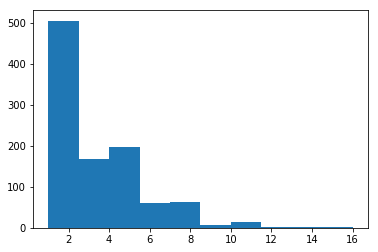

In [15]:
plt.hist(df.groupby('business_id').size())

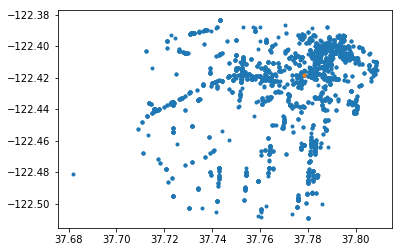

In [21]:
plt.plot(df.latitude, df.longitude, '.')
plt.plot([37.778155], [-122.418614], '.')

In [ ]:
np.dot(np.dot(np.linalg.inv(np.dot(X.T, X.T)), X.T), y)